In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data = pd.read_csv('dataset.csv')

In [4]:
data.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [6]:
data.columns

Index(['name', 'description', 'make', 'model', 'year', 'price', 'engine',
       'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')

In [7]:
data.dtypes

name               object
description        object
make               object
model              object
year                int64
price             float64
engine             object
cylinders         float64
fuel               object
mileage           float64
transmission       object
trim               object
body               object
doors             float64
exterior_color     object
interior_color     object
drivetrain         object
dtype: object

In [8]:
data.shape

(1002, 17)

In [9]:
data.isnull().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [10]:
data.isnull().sum().sum()

283

In [11]:
data.dropna(subset = ['price'], inplace = True)

In [12]:
data.shape

(979, 17)

In [13]:
data.isnull().sum()

name                0
description        56
make                0
model               0
year                0
price               0
engine              2
cylinders         102
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     37
drivetrain          0
dtype: int64

In [14]:
data.isnull().sum().sum()

256

In [15]:
object_columns = [i for i in data.columns if data[i].dtype == 'object']

In [16]:
object_columns

['name',
 'description',
 'make',
 'model',
 'engine',
 'fuel',
 'transmission',
 'trim',
 'body',
 'exterior_color',
 'interior_color',
 'drivetrain']

In [17]:
# Function to extract numeric values from engine specifications
def extract_engine_size(engine_str):
    if isinstance(engine_str, str):
        numbers = re.findall(r'\d+', engine_str)
        if numbers:
            return float(numbers[0])
    return np.nan

# Apply the function to create a new column for engine size
data['engine_size'] = data['engine'].apply(extract_engine_size)

In [18]:
# Droping categorical columns that are not including in the training of a model.
data = data.drop(columns=['name', 'description', 'engine'])

In [19]:
#Categorical columns
existing_categorical_cols = [col for col in data if data[col].dtype == 'object']

In [20]:
#Missing values by simple imputer with mean value
imputer = SimpleImputer(strategy='mean')
data[['cylinders', 'mileage', 'doors', 'engine_size']] = imputer.fit_transform(data[['cylinders', 'mileage', 
                                                                                     'doors', 'engine_size']])

In [21]:
#One-Hot Encoding Technique
data = pd.get_dummies(data, columns=existing_categorical_cols, drop_first=True)

In [22]:
data.head()

,year,price,cylinders,mileage,doors,engine_size,make_Audi,make_BMW,make_Buick,make_Cadillac,...,interior_color_Tupelo,interior_color_Tupelo/Black,interior_color_Volcano Brown,interior_color_White,interior_color_Wicker Beige/Black,interior_color_Wicker Beige/Global Black,interior_color_gray,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive
0,2024,74600.0,6.0,10.0,4.0,24.000000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2024,50170.0,6.0,1.0,4.0,14.971178,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2024,96410.0,8.0,0.0,4.0,6.000000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2023,46835.0,8.0,32.0,4.0,16.000000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2024,81663.0,6.0,10.0,4.0,24.000000,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [23]:
data.shape

(979, 782)

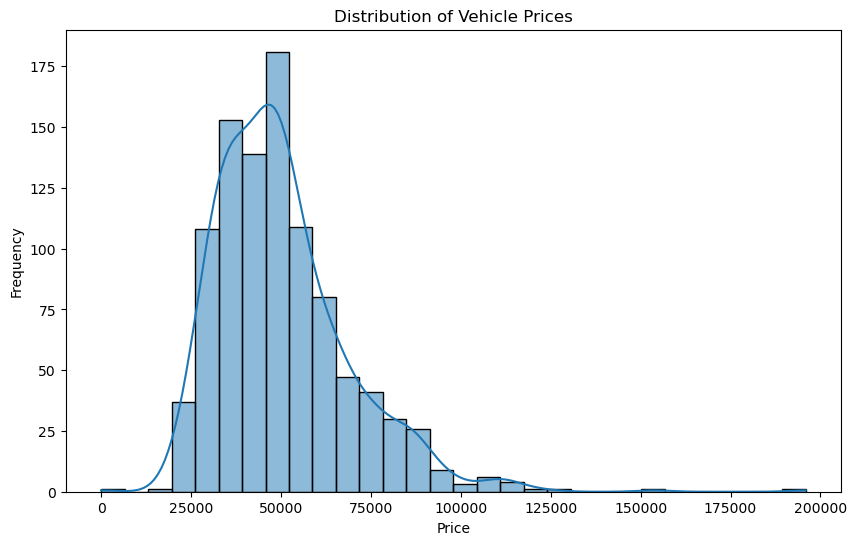

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

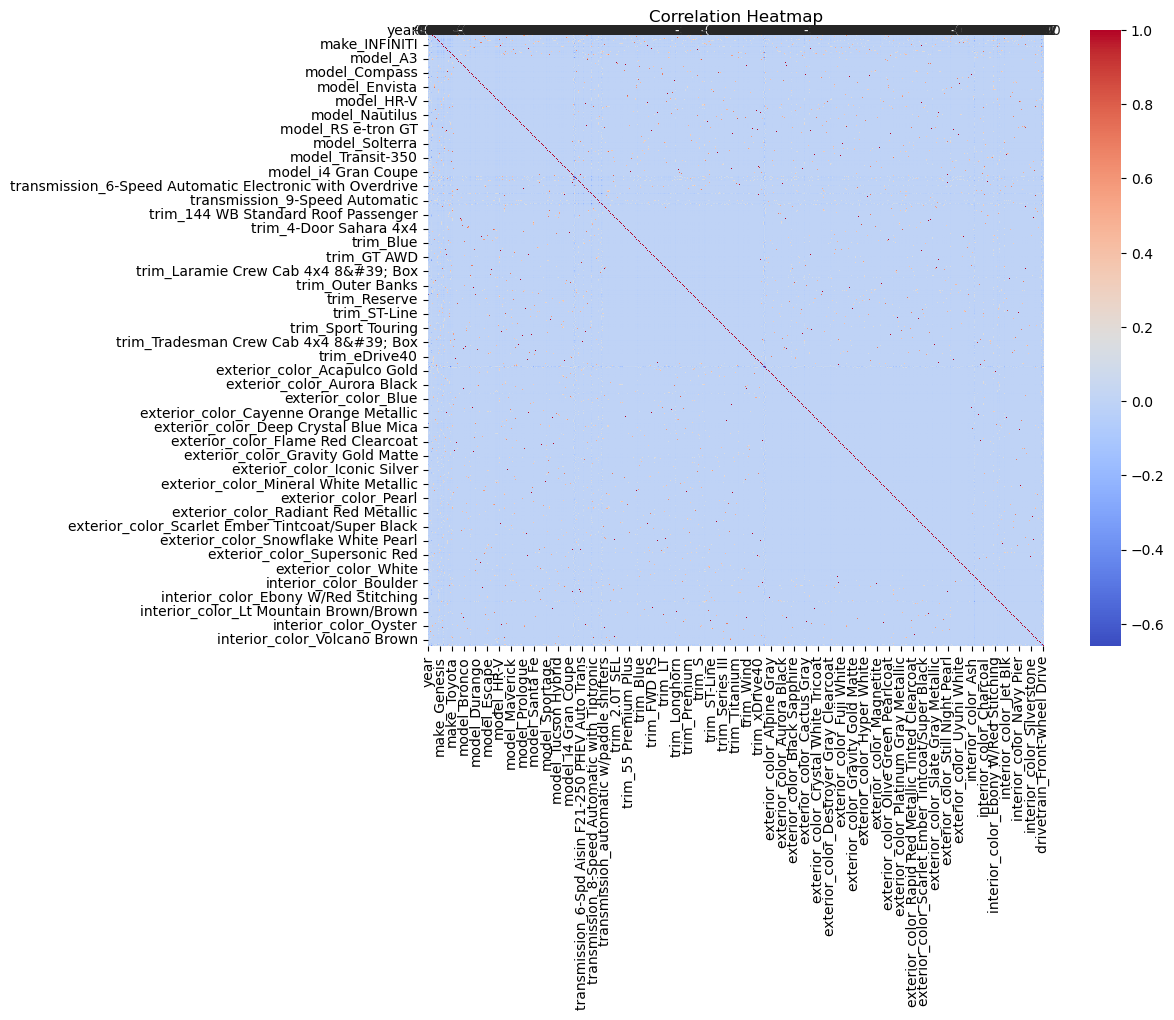

In [25]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
# Remove outliers in price column
upper_limit = data['price'].quantile(0.99)
lower_limit = data['price'].quantile(0.01)
data = data[(data['price'] <= upper_limit) & (data['price'] >= lower_limit)]

In [27]:
# Feature Scaling: Standardizing the features for models like Linear Regression
scaler = StandardScaler()
numeric_features = ['year', 'cylinders', 'mileage', 'doors', 'engine_size']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [28]:
#Splitting the Data
X = data.drop('price', axis=1)
y = data['price']
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

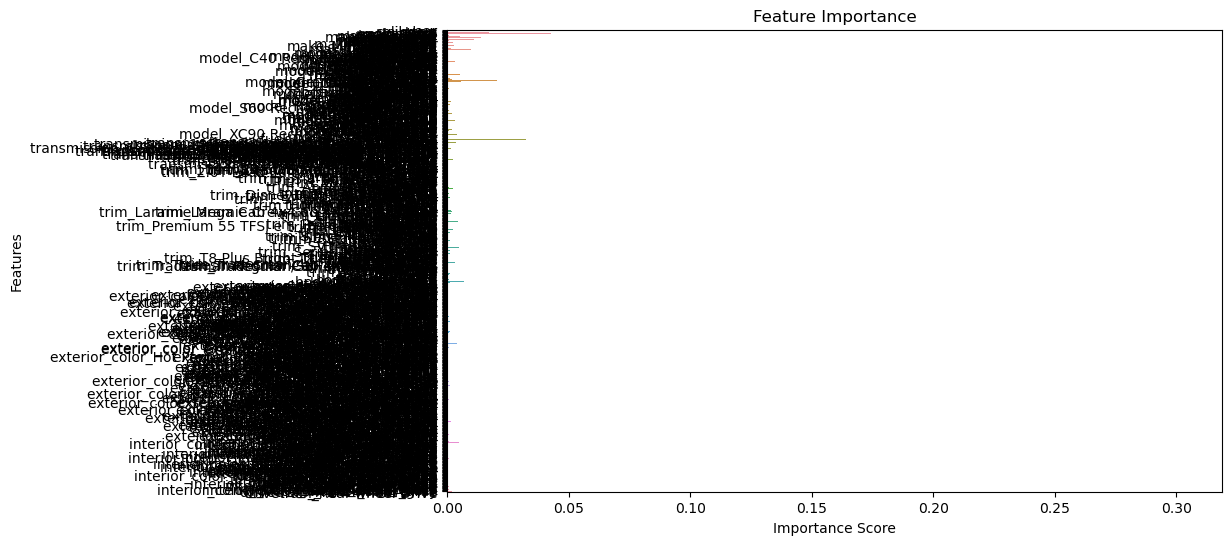

In [29]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
importances = model.feature_importances_
features = X_train.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [30]:
#Model Training improves Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [31]:
# Prediction of data on the testing data
y_pred_rf = rf_model.predict(X_test)

In [32]:
#Model performances
print("Random Forest Performance:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R^2 score:", r2_score(y_test, y_pred_rf))

Random Forest Performance:
Mean Absolute Error: 4403.659622120501
Mean Squared Error: 48120235.81174577
R^2 score: 0.8260055870341617


In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [34]:
from xgboost import XGBRegressor
# Assuming X_train is a DataFrame
X_train.columns = [str(col).replace('[', '').replace(']', '').replace('<', '').replace('>', '') for col in X_train.columns]
print(X_train.dtypes)

year                                        float64
cylinders                                   float64
mileage                                     float64
doors                                       float64
engine_size                                 float64
                                             ...   
interior_color_Wicker Beige/Global Black       bool
interior_color_gray                            bool
drivetrain_Four-wheel Drive                    bool
drivetrain_Front-wheel Drive                   bool
drivetrain_Rear-wheel Drive                    bool
Length: 781, dtype: object


In [35]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.78458096 0.78864468 0.79295249 0.83260599 0.80007643]


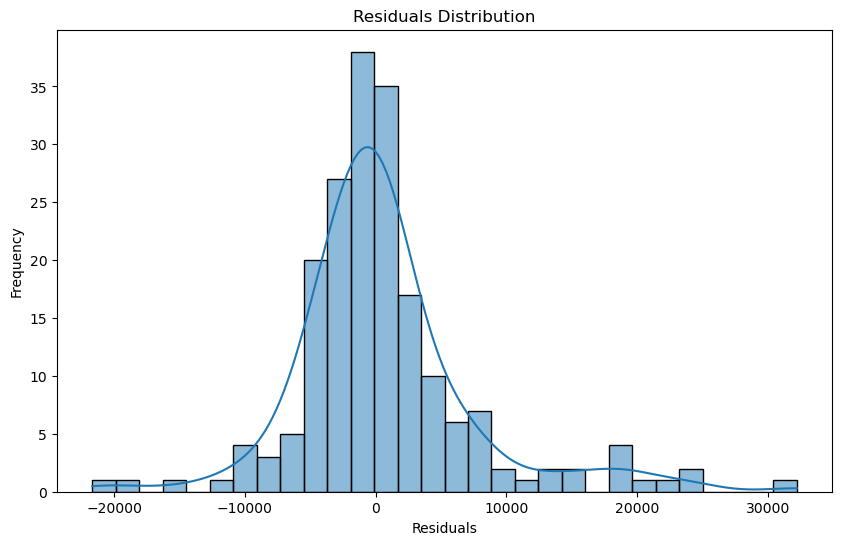

In [37]:
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [38]:
from sklearn.model_selection import cross_val_score
# For Linear Regression
lin_reg = LinearRegression()
cv_scores = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"Cross-Validation RMSE: {cv_rmse.mean()}")

Cross-Validation RMSE: 903758859938873.4


In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Apply to all feature columns

# Then apply cross-validation with the scaled data
lin_reg = LinearRegression()
cv_scores = cross_val_score(lin_reg, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"Cross-Validation RMSE: {cv_rmse.mean()}")


Cross-Validation RMSE: 8.334298464026473e+17


In [40]:
mse = -cv_scores  # Cross-validation scores are returned as negative MSE in sklearn
rmse = np.sqrt(mse)

In [41]:
mse

array([3.91934762e+35, 1.20519511e+36, 7.93584204e+35, 5.95107231e+35,
       6.09997153e+35])